We will be using **LOGISTIC REGRESSION** as it is a binary class classification problem. 

We have to predit weather the transaction is Fraud or Legit.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Importing data

In [2]:
train_df=pd.read_csv("D:/Project/CodeSoft/Credit_Card_Fraud_Detection/fraudtrain.csv")
test_df=pd.read_csv("D:/Project/CodeSoft/Credit_Card_Fraud_Detection/fraudTest.csv")

In [3]:
#Getting the dimension of both dataframe
print(np.shape(train_df))
print(np.shape(test_df))

(1296675, 23)
(555719, 23)


Both the dataframe have same number of columns, so we can join them

In [4]:
df=pd.concat([train_df,test_df],ignore_index=True)

# Data Preprocessing

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

**Checking for null values**

In [8]:
df.isnull().sum().sum()

0

**We have no null values**

**Getting name of all columns**

In [9]:

a=df.columns
columns=list(a)
print(columns)

['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


**Converting 'trans_date_trans_time' and 'dob' to proper format**

In [10]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

print(df['trans_date_trans_time'])
print(df['dob'])

0         2019-01-01 00:00:18
1         2019-01-01 00:00:44
2         2019-01-01 00:00:51
3         2019-01-01 00:01:16
4         2019-01-01 00:03:06
                  ...        
1852389   2020-12-31 23:59:07
1852390   2020-12-31 23:59:09
1852391   2020-12-31 23:59:15
1852392   2020-12-31 23:59:24
1852393   2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 1852394, dtype: datetime64[ns]
0         1988-03-09
1         1978-06-21
2         1962-01-19
3         1967-01-12
4         1986-03-28
             ...    
1852389   1966-02-13
1852390   1999-12-27
1852391   1981-11-29
1852392   1965-12-15
1852393   1993-05-10
Name: dob, Length: 1852394, dtype: datetime64[ns]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   trans_date_trans_time  datetime64[ns]
 2   cc_num                 int64         
 3   merchant               object        
 4   category               object        
 5   amt                    float64       
 6   first                  object        
 7   last                   object        
 8   gender                 object        
 9   street                 object        
 10  city                   object        
 11  state                  object        
 12  zip                    int64         
 13  lat                    float64       
 14  long                   float64       
 15  city_pop               int64         
 16  job                    object        
 17  dob                    datetime64[ns]
 18  trans_num             

**WE can calculate AGE from DOB**

In [12]:
# Calculate age
import datetime as dt
df['age']=dt.date.today().year-df['dob'].dt.year


Getting seperate columns for each hour, day and month

In [13]:
df['month']=df['trans_date_trans_time'].dt.month
df['hour']=df['trans_date_trans_time'].dt.hour
df['day']=df['trans_date_trans_time'].dt.dayofweek

df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,month,hour,day
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,35,1,0,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,45,1,0,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,61,1,0,1


Now, we have age so we don't need dob.

Also we can now ignore 'trans_date_trans_time'4

trans_num,cc_num and unix time is always unique.

so we are ignoring the following columns: "Unnamed: 0","trans_date_trans_time","cc_num","merchant","category","first","last","street","trans_num","city","state","job","dob","unix_time"


In [14]:
dro=["Unnamed: 0","trans_date_trans_time","cc_num","merchant","category","first","last","street","trans_num","city","state","job","dob","unix_time"]

for i in dro:
    df.drop(i,axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   amt         float64
 1   gender      object 
 2   zip         int64  
 3   lat         float64
 4   long        float64
 5   city_pop    int64  
 6   merch_lat   float64
 7   merch_long  float64
 8   is_fraud    int64  
 9   age         int64  
 10  month       int64  
 11  hour        int64  
 12  day         int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 183.7+ MB


We can calculate distance between customer and merchant beacuse there latitiude and longitutde is given.

Also the distn between 2 longitude or latitude is 110 kms.

In [16]:
df["latitude"]=df["lat"]-df["merch_lat"]
df["longitude"]=df["long"]-df["merch_long"]

#now distance by pythagoras
df["distance"] = np.sqrt((df["latitude"]*110)**2 + (df["longitude"]*110)**2)


Now colmn "latitude","longitude","lat","long","merch_long","merch_lat" should be dropped.


In [17]:
df.drop(["latitude","longitude","lat","long","merch_long","merch_lat"],axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   amt       float64
 1   gender    object 
 2   zip       int64  
 3   city_pop  int64  
 4   is_fraud  int64  
 5   age       int64  
 6   month     int64  
 7   hour      int64  
 8   day       int64  
 9   distance  float64
dtypes: float64(2), int64(7), object(1)
memory usage: 141.3+ MB


In [19]:
df.head(2)

,amt,gender,zip,city_pop,is_fraud,age,month,hour,day,distance
0,4.97,F,28654,3495,0,35,1,0,1,96.011245
1,107.23,F,99160,149,0,45,1,0,1,29.954105


Gender is Male or Female.

So we take Male=1 and Female=0

In [20]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df.head(2)

,amt,gender,zip,city_pop,is_fraud,age,month,hour,day,distance
0,4.97,0,28654,3495,0,35,1,0,1,96.011245
1,107.23,0,99160,149,0,45,1,0,1,29.954105


# Now do the same process on Trainingg df and testing df

**Training DF**

In [21]:
test_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [22]:
#Converting to date format
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['dob'] = pd.to_datetime(train_df['dob'])

# Calculate age
import datetime as dt
train_df['age']=dt.date.today().year-train_df['dob'].dt.year

#Getting hour,day,month
train_df['month']=train_df['trans_date_trans_time'].dt.month
train_df['hour']=train_df['trans_date_trans_time'].dt.hour
train_df['day']=train_df['trans_date_trans_time'].dt.dayofweek

#Calculating distance
train_df["latitude"]=train_df["lat"]-train_df["merch_lat"]
train_df["longitude"]=train_df["long"]-train_df["merch_long"]

#now distance by pythagoras
train_df["distance"] = np.sqrt((train_df["latitude"]*110)**2 + (train_df["longitude"]*110)**2)

#encoding male and female to 1 and 0
train_df['gender'] = train_df['gender'].map({'M': 1, 'F': 0})

#Colums to be dropped
dp=["Unnamed: 0","trans_date_trans_time","cc_num","merchant","category","first","last","street","trans_num","city","state","job","dob","unix_time","latitude","longitude","lat","long","merch_long","merch_lat"]

#dropping columns
for i in dp:
    train_df.drop(i,axis=1,inplace=True)

train_df.head(2)

,amt,gender,zip,city_pop,is_fraud,age,month,hour,day,distance
0,4.97,0,28654,3495,0,35,1,0,1,96.011245
1,107.23,0,99160,149,0,45,1,0,1,29.954105


**Testing DF**

In [23]:
#Converting to date format
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['dob'] = pd.to_datetime(test_df['dob'])

# Calculate age
import datetime as dt
test_df['age']=dt.date.today().year-test_df['dob'].dt.year

#Getting hour,day,month
test_df['month']=test_df['trans_date_trans_time'].dt.month
test_df['hour']=test_df['trans_date_trans_time'].dt.hour
test_df['day']=test_df['trans_date_trans_time'].dt.dayofweek

#Calculating distance
test_df["latitude"]=test_df["lat"]-test_df["merch_lat"]
test_df["longitude"]=test_df["long"]-test_df["merch_long"]

#now distance by pythagoras
test_df["distance"] = np.sqrt((test_df["latitude"]*110)**2 + (test_df["longitude"]*110)**2)

#encoding male and female to 1 and 0
test_df['gender'] = test_df['gender'].map({'M': 1, 'F': 0})

#Colums to be dropped
dp=["Unnamed: 0","trans_date_trans_time","cc_num","merchant","category","first","last","street","trans_num","city","state","job","dob","unix_time","latitude","longitude","lat","long","merch_long","merch_lat"]

#dropping columns
for i in dp:
    test_df.drop(i,axis=1,inplace=True)

test_df.head(2)

,amt,gender,zip,city_pop,is_fraud,age,month,hour,day,distance
0,2.86,1,29209,333497,0,55,6,12,6,29.260485
1,29.84,0,84002,302,0,33,6,12,6,109.084144


# Visualization

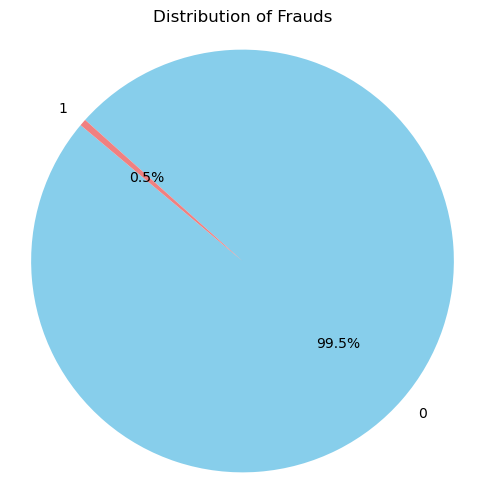

In [24]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
Fraud_counts = df['is_fraud'].value_counts()
labels = Fraud_counts.index
sizes = Fraud_counts.values
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Frauds')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

Only 1 percent of transaction are fraud

# MODEL


In [25]:
train_Y=train_df['is_fraud']

train_X=train_df
train_X.drop('is_fraud',axis=1,inplace=True)

In [26]:
#Preparing Testing data
test_Y=test_df['is_fraud']

test_X=test_df
test_X.drop('is_fraud',axis=1,inplace=True)

Different Types of Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create and train models
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()

logistic_model.fit(train_X,train_Y)
decision_tree_model.fit(train_X, train_Y)
random_forest_model.fit(train_X, train_Y)


c:\Users\LEGION\anaconda3\envs\CodSoft\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

# Model Evaluation

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Function to evaluate and display results
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred),"\n")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Evaluate Logistic Regression
print("Logistic Regression:")
evaluate_model(logistic_model, test_X, test_Y)

# Evaluate Decision Tree
print("\nDecision Tree:")
evaluate_model(decision_tree_model, test_X, test_Y)

# Evaluate Random Forest
print("\nRandom Forest:")
evaluate_model(random_forest_model, test_X, test_Y)


Logistic Regression:
Confusion Matrix:
 [[553346    228]
 [  2145      0]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Accuracy Score: 0.9957298562762835

Decision Tree:
Confusion Matrix:
 [[552179   1395]
 [   964   1181]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.46      0.55      0.50      2145

    accuracy                           1.00    555719
   macro avg       0.73      0.77      0.75    555719
weighted avg       1.00      1.00      1.00    555719

Accuracy Score: 0.9957550488646241

Random Forest:
Confusion Matrix:
 [[553360    214]
 [  1027   1118]] 

Classif

# Selecting Model

Random forest accuracy is maximum

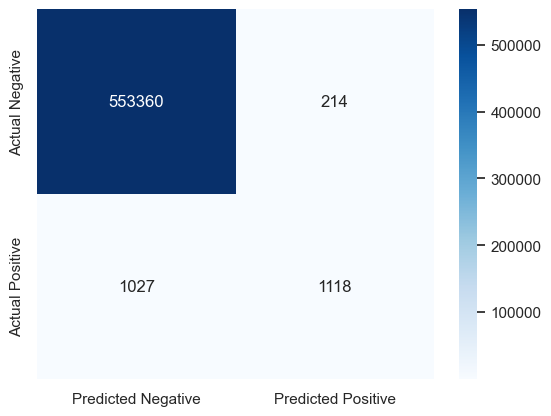

In [29]:
model=random_forest_model
y_pred = model.predict(test_X)


matrix=confusion_matrix(test_Y, y_pred)

sns.set(font_scale=1)  # Adjust the font size as needed
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])

plt.show()

